# [IAPR][iapr]: Project


**Group ID:** xx

**Author 1 (sciper):** Ludovic Pujol (301033)  
**Author 2 (sciper):** Arthur André (287599)   
**Author 3 (sciper):** Octavio Profeta (301450)  

**Release date:** 27.04.2023


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

In this project, you will be working on solving tiling puzzles using image analysis and pattern recognition techniques. Tiling puzzles are a classic type of puzzle game that consists of fitting together pieces of a given shape (in this case squared to form a complete image. The goal of this project is to develop an algorithm that can automatically reconstruct tiling puzzles from a single input image. 

---

## 1. Data

### Input data
To achieve your task, you will be given images that look like this:


![train_00.png](data_project/project_description/train_00.png)

### Example puzzle content
Example of input of solved puzzles. 
Solution 1
<img src="data_project/project_description/solution_example.png" width="512"/>
Solution 2
<img src="data_project/project_description/solution_example2.jpg" width="512"/>


### 1.1. Image layout

- The input for the program will be a single image with a size of __2000x2000 pixels__, containing the pieces of the tiling puzzles randomly placed in it. The puzzles sizes vary from __3x3, 3x4, or 4x4__ size. 
    -__You are guaranteed to always have the exact number of pieces for each puzzle__ 
        -For each puzzle you always are expected to find exaclty 9,12,16 pieces
        -If you find something else, either you are missing pieces, or added incorrect pieces for the puzzle

- The puzzle pieces are square-shaped with dimensions of 128x128 pixels (before rotation). 

- The input image will contain pieces from __two or three (but never four)__ different tiling puzzles, as well as some __extra pieces (outliers)__ that do not belong to either puzzle.


## 2. Tasks (Total 20 points) 


The project aims to:
1) Segment the puzzle pieces from the background (recover the pieces of 128x128 pixels)   \[ __5 points__ \] 

2) Extract features of interest from puzzle pieces images \[ __5 points__ \]   

3) Cluster puzzle pieces to identify which puzzle they belong, and identify outliers.  \[ __5 points__ \]   

4) Solve tiling puzzle (find the rotations and translations to correctly allocate the puzzle pieces in a 3x3, 3x4 or 4x4 array.) \[ __5 points__ \]   

##### The images used for the puzzles have self-repeating patterns or textures, which ensures that all puzzle pieces contain more or less the same features regardless of how they were cut. 




### 1.2. Output solution pieces.

For each inpute image, the output solution will include N images with solved puzzles, where N is the number of puzzles in the input image. and M images, that are Each of these images will contain the solved solution to one of the N puzzles in the input. 


-  Example input:  train_05.png

- Example solution:
        -solution_05_00.png solution_05_01.png solution_05_02.png 
        -outlier_05_00.png outlier_05_01.png outlier_05_02.png ...

- Example input:  train_07.png
- Example solution:
        -solution_07_00.png solution_07_01.png 
        -outlier_07_00.png outlier_07_01.png outlier_07_02.png ...


__Watch out!__ output resolution should always be like this:  
<table ><tr><th >Puzzle pieces <th><th> pixel dimentions <th> <th> pixel dimentions <th> <tr>
<tr><td> 3x3 <td><td> 384x384 <td><td> 3(128)x3(128) <td> <tr>
<tr><td> 3x4 <td><td> 384x512 <td><td> 3(128)x4(128)<tr>
<tr><td> 4x4 <td><td> 512x512 <td><td> 4(128)x4(128)<tr>
<tr><td> 1x1 (outlier)<td><td> 128x128 <td><td> (1)128x(1)128 <td><tr><table>





__Order of the solutions (and rotations) it's not a problem for the grading__




the output solution will be a final image of resolution (1283)x(1283), with each piece correctly placed in its corresponding location in the 3x3 array. Similarly, if the puzzle consists of 3x4 or 4x4 pieces, the output solution will be an image of resolution (1283)x(1284) or (1284)x(1284)



### 1.3 Data folder Structure

You can download the data for the project here: [download data](https://drive.google.com/drive/folders/1k3xTH0ZhpqZb3xcZ6wsOSjLzxBNYabg3?usp=share_link)

```
data_project
│
└─── project_description
│    │    example_input.png      # example input images
│    │    example_textures1.png      # example input images
│    │    example_textures2.png      # example input images
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.png        # Train image 00
│    │    ...
│    │    train_16.png        # Train image 16
│    └─── train_labels.csv    # Ground truth of the train set
|    
└────train_solution
│    │    solution_00_00.png        # Solution puzzle 1 from Train image 00
│    │    solution_00_01.png        # Solution puzzle 2 from Train image 00
│    │    solution_00_02.png        # Solution Puzzle 3 from Train image 00
│    │    outlier_00_00.png         # outlier     from Train image 00
│    │    outlier_00_01.png         # outlier     from Train image 00
│    │    outlier_00_03.png         # outlier     from Train image 00
│    │    ...
│    │    solution_15_00.png        # Solution puzzle 1 from Train image 15
│    │    solution_15_01.png        # Solution puzzle 2 from Train image 15
│    │    outlier_15_00.png         # outlier     from Train image 15
│    └─── outlier_15_01.png         # outlier     from Train image 15
│
└─── test
     │    test_00.png         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx.png             # Test image xx (day of the exam only)
```



## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** (test folder) with few images, but **no ground truth** (no solutions).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_solution** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---


## 4. Your code

In [1]:
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import os
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

### 4.1 Extracting all pieces from the image

This first part is designed to extract all the pieces from the original image, and create a new image for each piece. It prepares the data for the next step which is clustering.

- ##### 4.1.1 Opening / saving images

The following code is provided to help opening RGB images and saving images puzzles in the correct format.

In [2]:
def load_input_image(image_index ,  folder ="train" , path = "data_project"):
    
    filename = "train_{}.png".format(str(image_index).zfill(2))
    path_solution = os.path.join(path,folder , filename )
    
    im= PIL.Image.open(os.path.join(path,folder,filename)).convert('RGB')
    im = np.array(im)
    return im

def save_solution_puzzles(image_index , solved_puzzles, outliers  , folder ="train" , path = "data_project"  ,group_id = 0):
    
    path_solution = os.path.join(path,folder + "_solution_{}".format(str(group_id).zfill(2)))
    if not  os.path.isdir(path_solution):
        os.mkdir(path_solution)

    print(path_solution)
    for i, puzzle in enumerate(solved_puzzles):
        filename =os.path.join(path_solution, "solution_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(puzzle).save(filename)

    for i , outlier in enumerate(outliers):
        filename =os.path.join(path_solution, "outlier_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(outlier).save(filename)
        


- ##### 4.1.2 Edge detection

We need to perform edge detection to extract the contours of the puzzle pieces. We can use the function from [cv2.Canny()](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html) as follows:

In [3]:
import cv2

def edge_detection(img, thresh1=25, tresh2=250):
    edges = cv2.Canny(img, thresh1, tresh2)
    return edges

- ##### 4.1.3 Morphological closing

The obtained images avec edge detection is a binary image with some noise. We can use morphological closing for making sure that all the 255 pixels from a single piece are connected. This will ease the labelling of the pieces. We can use the function from [skimage.morphology.closing()](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.closing) as follows:
```python

In [4]:
from skimage import morphology

def close_edges(edges, kernel_size=8):
    kernel = morphology.disk(kernel_size)
    edges = morphology.closing(edges, kernel)
    return edges

- ##### 4.1.4 Connected components labelling

We now have a binary image with pieces whose all the adges have been detected and connected. Now we need the identify each piece using labelling (i.e. assign a unique label all the pixels of a piece). We can use the function from [skimage.measure.label()](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.label) as follows:

In [5]:
from skimage import measure

def label_edges(edges):
    labels = measure.label(edges)
    return labels

We will also need the region properties of each label (i.e. the bounding box, etc). We can use the function from [skimage.measure.regionprops()](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops) as follows:

In [6]:
def get_region(labels):
    regions = measure.regionprops(labels)
    return regions

- ##### 4.1.5 Extracting pieces

Now we need to extract the pieces from the original image. We can use the bounding box of each region to do so. We will return the pieces in a list of images. They are not rotated yet. We propose the following function:

In [7]:
def extract_pieces(image, image_bin, regions):
    
    '''
    Extract pieces from image and image_bin using regions.
    
    inputs:
        - image: original image
        - image_bin: binary image
        - regions: regions of the image
    
    outputs:
        - pieces_bin: list pieces with their binary edges 
        - pieces: list of original pieces images (RGB)
    '''
    
    # Initialize list of pieces (binary and original)
    pieces_bin = []
    pieces = []
    
    # Parcour all regions
    for region in regions:
        
        # Get bounding box (max and min row and column)
        minr, minc, maxr, maxc = region.bbox
        
        # If the region is too small, we ignore it
        if (maxr - minr < 128) or (maxc - minc < 128):
            continue
        
        # Crop image
        piece_bin = image_bin[minr:maxr, minc:maxc]
        piece = image[minr:maxr, minc:maxc]
        
        # Append binary and original piece
        pieces_bin.append(piece_bin)
        pieces.append(piece)
        
    return pieces_bin, pieces

- ##### 4.1.6 Detecting corners

To pivot the pieces, we need to detect the corners of each piece, then rotate the image so that the detected corners are placed in the actual corners of the image. To detect the corners we look for all the white pixels on the upper boundary of the region (or piece), and determine which one is at a distance of 128/sqrt(2) from the center of the region. 

In [8]:
def get_corners(pieces_bin):

    # Initialize list of corners
    corners = []
    
    # Parcour all binary pieces
    for piece in pieces_bin:
        
        # Get coordinates of white pixels on the first row only and add 0 as the row coordinate
        pixels = [[0, col[0]] for col in np.argwhere(piece[0, :] == 255)]
        
        # In case there is no white pixels on the upper boundaryn check the second row
        if len(pixels) == 0:
            pixels = [[1, col[0]] for col in np.argwhere(piece[1, :] == 255)]
        
        # Compute the center of the piece
        center = np.array(piece.shape)/2
        
        # For each pixel, check if it is a corner (distance to center = 128/sqrt(2))
        for pixel in pixels[:]:
                
            # Compute distance to center
            dist = np.linalg.norm(pixel - center)
            
            # Remove pixels if the distance is too big
            if dist > 128/np.sqrt(2) + 2:
                pixels.remove(pixel)
        
        # The corner is the pixel with the biggest distance to the center
        corner = pixels[np.argmax(np.linalg.norm(pixels - center, axis=1))]
                    
        # Append the corners
        corners.append(corner)
    
    return corners

- ##### 4.1.7 Rotating pieces
 
Now we have the corners of each piece, we can rotate the image so that the corners are placed in the actual corners of the image. We propose the following function, using the function from [skimage.transform.rotate()](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.rotate):

In [9]:
from skimage import transform

def rotate_pieces(pieces, corners):
    
    # Initialize list of rotated pieces
    rotated_pieces = []
    
    # Parcour all pieces
    for piece, corner in zip(pieces, corners):
        
        # Compute the angle of the piece taking the center as the origin
        angle = np.arctan2(corner[0] - piece.shape[0]/2, corner[1] - piece.shape[1]/2) * 180/np.pi + 135
        
        # Rotate the piece
        rotated_piece = transform.rotate(piece, angle, order=0)
        
        # Append the rotated piece
        rotated_pieces.append(rotated_piece)
        
    return rotated_pieces

- ##### 4.1.8 Cropping pieces

The final step is the crop the pieces so that they are of size 128x128. We propose the following function:

In [10]:
def crop_rotated_pieces(rotated_pieces, size=128):
        
    # Initialize list of cropped pieces
    cropped_pieces = []
    
    # Parcour all rotated pieces
    for piece in rotated_pieces:
        
        # Crop the piece
        cropped_piece = piece[int(piece.shape[0]/2-size/2):int(piece.shape[0]/2+size/2), int(piece.shape[1]/2-size/2):int(piece.shape[1]/2+size/2)]
        
        # Append the cropped piece
        cropped_pieces.append(cropped_piece)
        
    return cropped_pieces

- ##### 4.1.9 Plotting images

Follows a function to plot images in a grid. This will be useful to plot the results of each step of our pipeline.

In [11]:
def plot_images(images, ncols=5):

    # Get number of images
    n_images = len(images)
    print("Number of images: {}".format(n_images))
    
    # Get number of rows
    nrows = n_images // ncols + 1
    
    # Get figure size
    figsize = (ncols * 3, nrows * 3)
    
    # Create figure
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    
    # Plot images
    for i, ax in enumerate(axes.flatten()):
        if i < n_images:
            ax.imshow(images[i])
        else:
            ax.axis('off')
            
    plt.tight_layout()
    plt.show()
    

- ##### 4.1.10 Putting it all together

We propose the following function to put all the previous steps together. It will be useful to test our pipeline on a single image.

In [12]:
def get_pieces(image_idx, thresh1=25, thresh2=250, kernel_size=3, size=128):
    
    # Load image
    image = load_input_image(image_idx)
        
    # Detect edges
    edges = edge_detection(image, thresh1, thresh2)
    
    # Close edges
    edges = close_edges(edges, kernel_size)
    
    # Label edges
    labels = label_edges(edges)
    
    # Get regions
    regions = get_region(labels)
    
    # Extract pieces
    pieces_bin, pieces = extract_pieces(image, edges, regions)
    
    # Get corners
    corners = get_corners(pieces_bin)
    
    # Rotate pieces
    rotated_pieces = rotate_pieces(pieces, corners)
    
    # # Crop rotated pieces
    cropped_pieces = crop_rotated_pieces(rotated_pieces, size)
    
    # # Plot images
    # plot_images(cropped_pieces)
    
    # # Plot single image
    # plt.imshow(edges)
    # plt.show()
    
    return cropped_pieces

pieces = get_pieces(0)

### 4.2 Clustering

Now that we have all the pieces, we need to cluster them to identify which puzzle they belong to, and identify outliers. We propose the following methodology:


 - ##### 4.2.1 blablabla

explication ici

In [14]:
# Code ici

- ##### 4.2.2 blablabla

explication ici

In [15]:
# Code ici

***
# START - CRASH ZONE

# -------------- A PARTIR D'ICI C'EST LE CODE AU PROPRE --------------

In [256]:
import numpy as np
import cv2

def clustering(puzzles_pieces):
    # Step 1: Preprocess puzzle piece images
    # Assuming you have a list of puzzle piece images stored in 'puzzle_pieces_input_features'
    puzzle_pieces_input_features = puzzles_pieces

    # Step 2: Denoise puzzle piece images
    print("Denoising images...")
    denoised_images = []
    for image in puzzle_pieces_input_features:
        # Apply denoising function (e.g., using the fastNlMeansDenoisingColored function in OpenCV)
        denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
        denoised_images.append(denoised_image)

    # Step 3: Extract deep learning features
    print("Extracting features...")
    # Pre-trained CNN model for feature extraction (EfficientNetB0)
    model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

    feature_list = []
    for image in denoised_images:
        preprocessed_image = cv2.resize(image, (128, 128))  # Resize the image to 128x128
        features = model.predict(np.expand_dims(preprocessed_image, axis=0))
        features = features.flatten()
        feature_list.append(features)  
    

    print("PCA...")
    # Step 3: Dimensionality reduction (optional)
    # Assuming you want to reduce the dimensionality to 2 for visualization purposes
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(feature_list)

    print("Clustering...")
    # Step 4: Apply clustering algorithm (DBSCAN)
    dbscan = DBSCAN(eps=3, min_samples=2)  # Adjust parameters as needed
    clusters = dbscan.fit_predict(reduced_features)

    # Step 5: Assign puzzle IDs
    unique_clusters = np.unique(clusters)
    puzzle_ids = []
    for cluster in clusters:
        if cluster == -1:
            # Assign a unique ID for outliers or noise points
            puzzle_ids.append(-1)
        else:
            # Assign a unique ID for each cluster
            puzzle_ids.append(unique_clusters.tolist().index(cluster))

    # Visualize the clustering results
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters)
    plt.title('Clustering Results')
    plt.show()

    return puzzle_ids, reduced_features, puzzle_pieces_input_features

In [257]:
def get_final_puzzles(puzzle_ids, reduced_features, puzzle_pieces):
    unique_clusters = np.unique(puzzle_ids)
    final_full_puzzles = []
    outlier_pieces= []	

    cluster_lists = {'pieces': [], 'features': []}

    for cluster in unique_clusters:
        cluster_lists['pieces'].append([])  # Initialize an empty list for puzzle pieces
        cluster_lists['features'].append([])  # Initialize an empty list for features

    for i, id in enumerate(puzzle_ids):
        if id == -1:  # Handle outlier or noise points
            outlier_pieces.append(puzzle_pieces[i])
        else:
            cluster_lists['pieces'][id].append(puzzle_pieces[i])
            cluster_lists['features'][id].append(reduced_features[i])

    for i in range(len(cluster_lists['pieces'])):
        if len(cluster_lists['pieces'][i]) == 9 or len(cluster_lists['pieces'][i]) == 16 or len(cluster_lists['pieces'][i]) == 12:
            final_full_puzzles.append(cluster_lists['pieces'][i])
        elif len(cluster_lists['pieces'][i]) < 9:
            for j in range(len(cluster_lists['pieces'][i])):
                outlier_pieces.append(cluster_lists['pieces'][i][j])
        else:
            mean_feat = np.mean(cluster_lists['features'][i], axis=0)
            distances = []
            for j in range(len(cluster_lists['features'][i])):
                distances.append(np.linalg.norm(cluster_lists['features'][i][j] - mean_feat))
            sorted_indices = np.argsort(distances)
            
            if len(cluster_lists['pieces'][i]) > 12:
                if len(cluster_lists['pieces'][i]) > 16:
                    #take 16 closest pieces
                    final_full_puzzles.append([cluster_lists['pieces'][i][sorted_indices[k]] for k in range(16)])
                    #other pieces are outliers
                    for j in range(16, len(cluster_lists['pieces'][i])):
                        outlier_pieces.append(cluster_lists['pieces'][i][sorted_indices[j]])
                else:
                    #take 12 closest pieces
                    final_full_puzzles.append([cluster_lists['pieces'][i][sorted_indices[k]] for k in range(12)])
                    #other pieces are outliers
                    for j in range(12, len(cluster_lists['pieces'][i])):
                        outlier_pieces.append(cluster_lists['pieces'][i][sorted_indices[j]])
            else:
                #take 9 closest pieces
                final_full_puzzles.append([cluster_lists['pieces'][i][sorted_indices[k]] for k in range(9)])
                #other pieces are outliers
                for j in range(9, len(cluster_lists['pieces'][i])):
                    outlier_pieces.append(cluster_lists['pieces'][i][sorted_indices[j]])

    return final_full_puzzles, outlier_pieces

            

In [258]:
def pieces_to_puzzle(puzzle_pieces):

    if len(puzzle_pieces) == 9:
        num_rows = 3
        num_cols = 3
    elif len(puzzle_pieces) == 12:
        num_rows = 3
        num_cols = 4
    elif len(puzzle_pieces) == 16:
        num_rows = 4
        num_cols = 4
    canvas_height = 128 * num_rows
    canvas_width = 128 * num_cols

    # Create an empty canvas to accommodate the target puzzle grid
    canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

    # Iterate over the shuffled puzzle pieces and place them on the canvas in a grid pattern
    for i, piece in enumerate(puzzle_pieces):
        row = i // num_cols
        col = i % num_cols
        x = col * 128
        y = row * 128
        canvas[y:y+128, x:x+128] = piece

    return canvas



In [259]:
def solve(image_loaded):
    """
    Wrapper function to solve puzzles from an image
            
    Parameters
    ----------
    image:
        image to solve (np.array)

    Returns
    """
    #get puzzle pieces
    puzzle_pieces_raw = get_puzzle_pieces(image_loaded, plot_pieces=False)

    #clusterings
    puzzle_ids, reduced_features, puzzle_pieces_raw = clustering(puzzle_pieces_raw)

    puzzle_pieces, outlier_pieces =get_final_puzzles(puzzle_ids, reduced_features, puzzle_pieces_raw)

    solved_puzzles = []
    for i in range(len(puzzle_pieces)):
        solved_puzzles.append(pieces_to_puzzle(puzzle_pieces[i]))
    
    
    return solved_puzzles , outlier_pieces

In [260]:
def solve_and_export_puzzles_image(image_index , folder = "train" , path = "data_project"  , group_id = "00"):
    """
    Wrapper funciton to load image and save solution
            
    Parameters
    ----------
    image:
        index number of the dataset

    Returns
    """
    image_loaded = load_input_image(image_index , folder = folder , path = path)
    
    solved_puzzles, outlier_images = solve(image_loaded)
    
    save_solution_puzzles (image_index , solved_puzzles , outlier_images , folder = folder ,group_id =group_id)
        
    return image_loaded , solved_puzzles , outlier_images

# END - CRASH ZONE
***

solving  0
Denoising images...
Extracting features...
1/1 [==============================] - 0s 56ms/step
PCA...
Clustering...


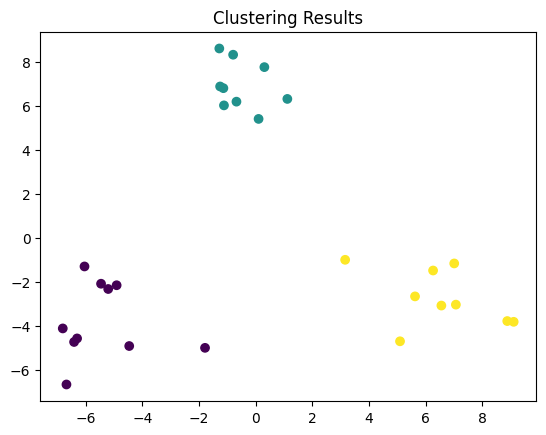

data_project/train_solution_29
solving  1
Denoising images...
Extracting features...
1/1 [==============================] - 0s 201ms/step
PCA...
Clustering...


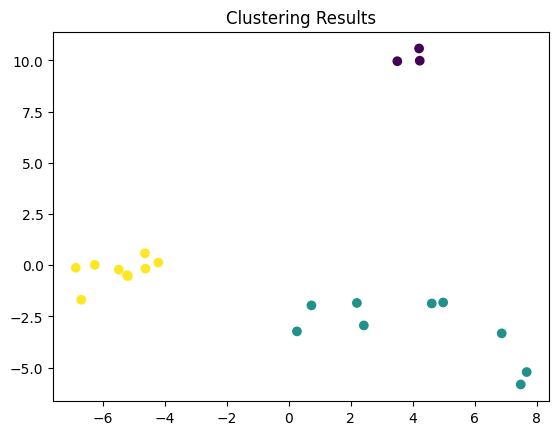

data_project/train_solution_29
solving  2
Denoising images...
Extracting features...
1/1 [==============================] - 0s 65ms/step
PCA...
Clustering...


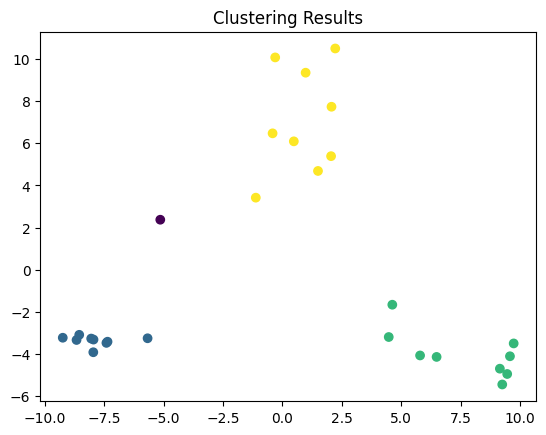

data_project/train_solution_29
solving  3
Denoising images...
Extracting features...
1/1 [==============================] - 0s 68ms/step
PCA...
Clustering...


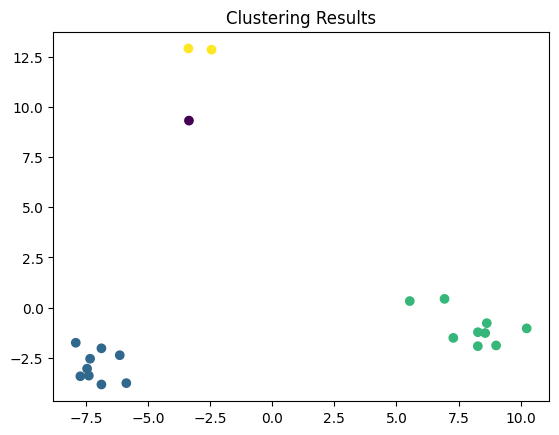

data_project/train_solution_29
solving  4
Denoising images...
Extracting features...
1/1 [==============================] - 0s 61ms/step
PCA...
Clustering...


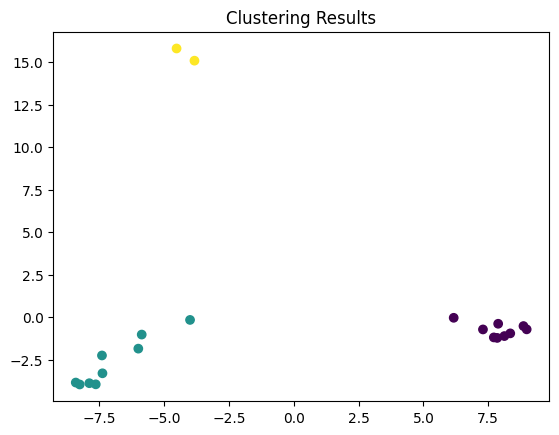

data_project/train_solution_29
solving  5
Denoising images...
Extracting features...
1/1 [==============================] - 0s 62ms/step
PCA...
Clustering...


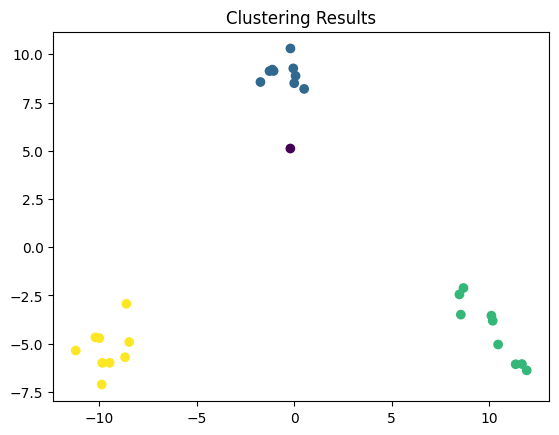

data_project/train_solution_29
solving  6
Denoising images...
Extracting features...
1/1 [==============================] - 0s 61ms/step
PCA...
Clustering...


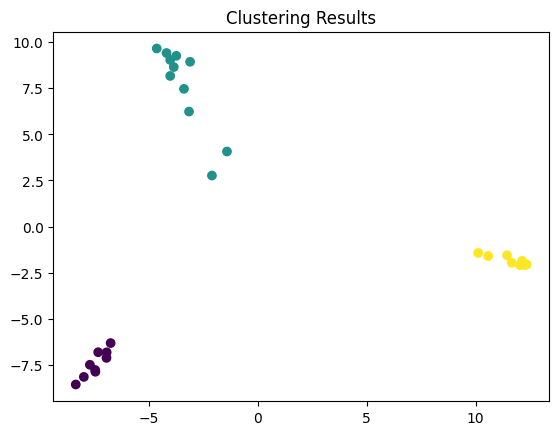

data_project/train_solution_29
solving  7
Denoising images...
Extracting features...
1/1 [==============================] - 0s 58ms/step
PCA...
Clustering...


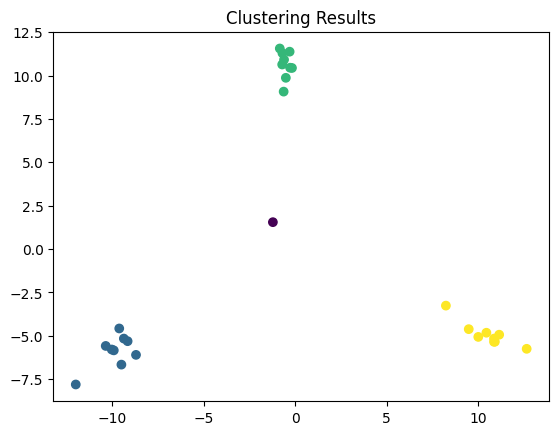

data_project/train_solution_29
solving  8
Denoising images...
Extracting features...
1/1 [==============================] - 0s 65ms/step
PCA...
Clustering...


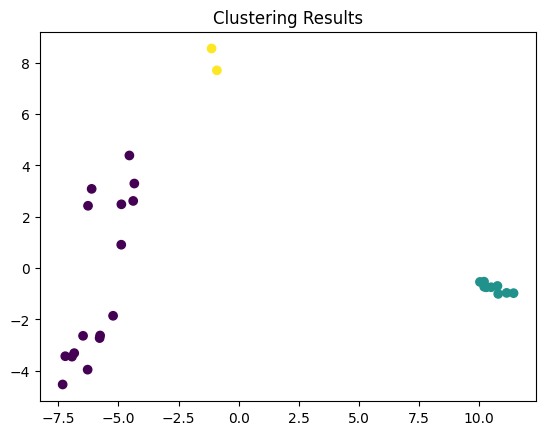

data_project/train_solution_29
solving  9
Denoising images...
Extracting features...
1/1 [==============================] - 0s 73ms/step
PCA...
Clustering...


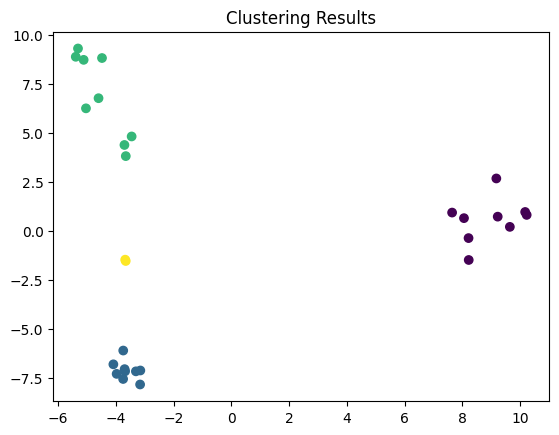

data_project/train_solution_29
solving  10
Denoising images...
Extracting features...
1/1 [==============================] - 0s 65ms/step
PCA...
Clustering...


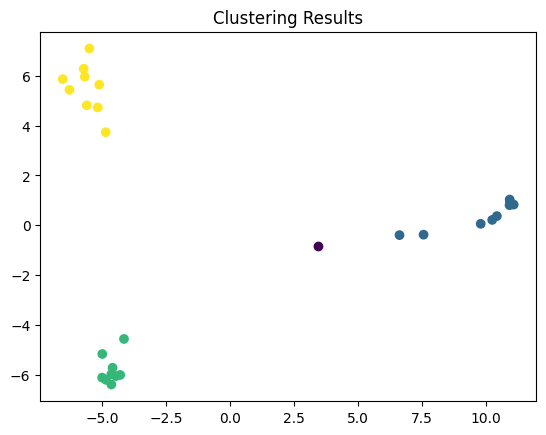

data_project/train_solution_29
solving  11
Denoising images...
Extracting features...
1/1 [==============================] - 0s 68ms/step
PCA...
Clustering...


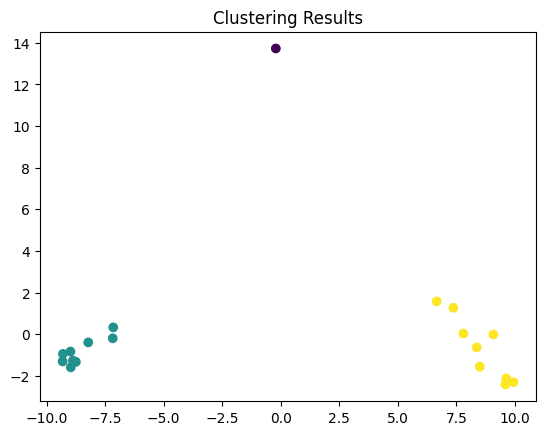

data_project/train_solution_29


In [261]:
group_id = 29
# Evaluate all images
games_id = [0,1,2,3,4,5,6,7,8,9,10,11]  # to evaluate  three images

for i in games_id :
    
    print("solving " , i)
    # Saving results
    image_loaded , solved_puzzles , outlier_images = solve_and_export_puzzles_image(i , group_id = group_id)
    
  


## Evaluation metrics

The evaluation metrics will be liberated in the following days. 


## Gabor filters

$$ gb(x,y) = \exp \left( -\frac{1}{2} \left( \frac{x_{\theta}^2}{\sigma^2} + \frac{y_{\theta}^2}{(\Gamma\sigma)^2} \right) \right) \cos \left( \frac{2 \pi}{\lambda} x_{\theta} + \psi \right) $$
